In [24]:
import sys
import os

# Get the parent directory
parent_dir = os.path.dirname(os.path.realpath("../"))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from torch.utils.data import DataLoader

from data.dataloader import aos_dataloader, get_aos_loaders
from data import AOSDataset
from utils import plot_dataset, plot_dataloader

/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.8.dylib
  Referenced from: <A9A8F989-731E-38CF-AD19-47727B1A070E> /Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/site-packages/torchvision/../../../libjpeg.8.dylib' (no such file), '/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/site-packages/torchvision/../../../libjpeg.8.dylib' (no such file), '/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/lib/python3.9/lib-dynload/../../libjpeg.8.dylib' (no such file), '/Users/PhilippSchmidt/miniforge3/envs/cvlab2023/bin/../lib/libjpeg.8.dylib' (no such file), '/usr/local/lib/libjpeg.8.dylib' (no such file

In [40]:
G_SCENARIO = 1
G_DATSET_MAX_SIZE = None  # for speed we reduce the dataset size, enter None for all data.

# use small test set in the beginning to validate that the code is working.
G_TRAIN_SET_RATIO = 0.5
G_TEST_SET_RATIO = 1 - G_TRAIN_SET_RATIO
assert (G_TEST_SET_RATIO + G_TRAIN_SET_RATIO) <= 1.0, 'Test and Train set split invalid'

# choose data set location
G_DATASET_LOCATION = "../../data/aos-data/focalstack-1/20230912_part1"
G_DATASET_LOCATION = "../../../focal_dataset"

#####################################
# Training settings
G_BATCH_SIZE = 128
G_LEARNING_RATE = 0.001

In [41]:
dataset = AOSDataset(
    G_DATASET_LOCATION,
    relative_path=True,
    maximum_datasize=G_DATSET_MAX_SIZE
)

print(dataset.__len__())

5362


In [42]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [43]:
feature, label = next(iter(dataloader))
print(feature.shape)
print(label.shape)

torch.Size([1, 3, 512, 512])
torch.Size([1, 1, 512, 512])


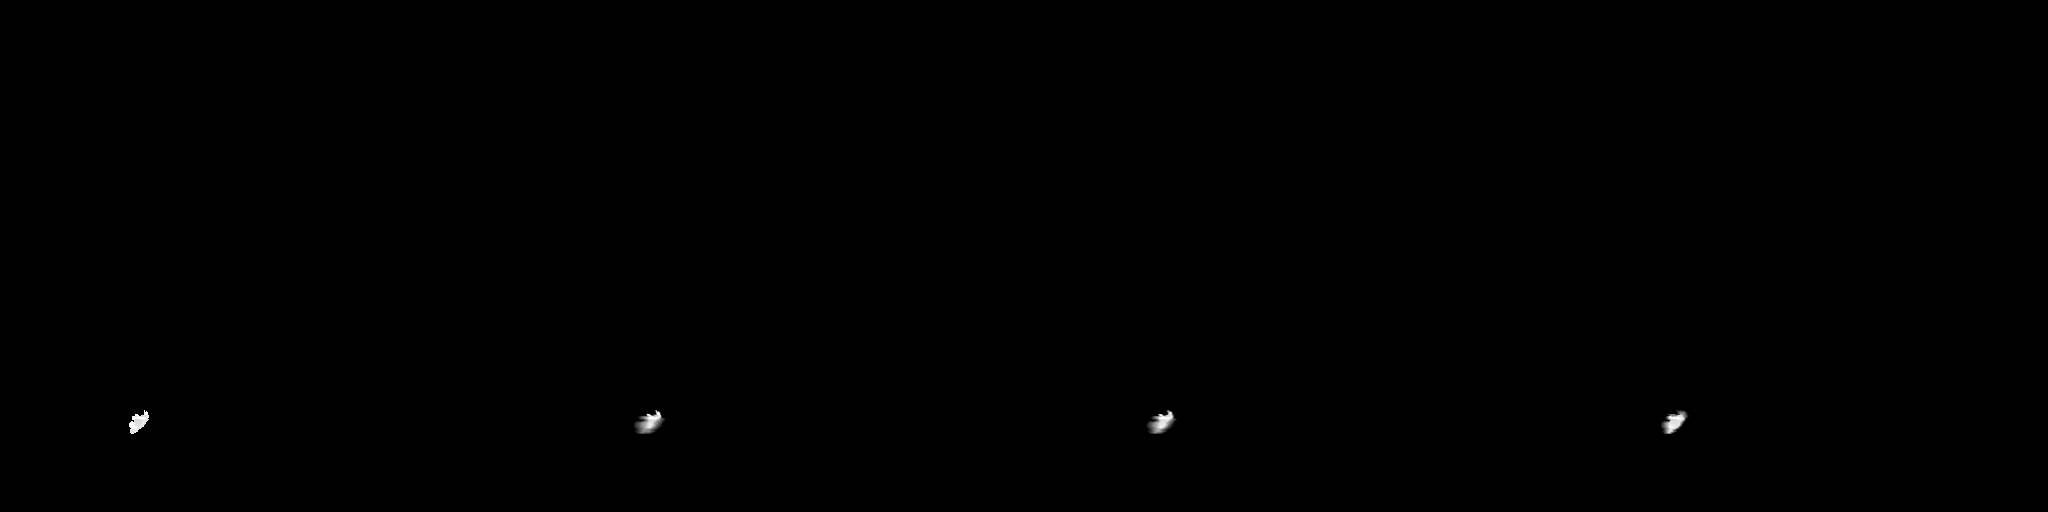

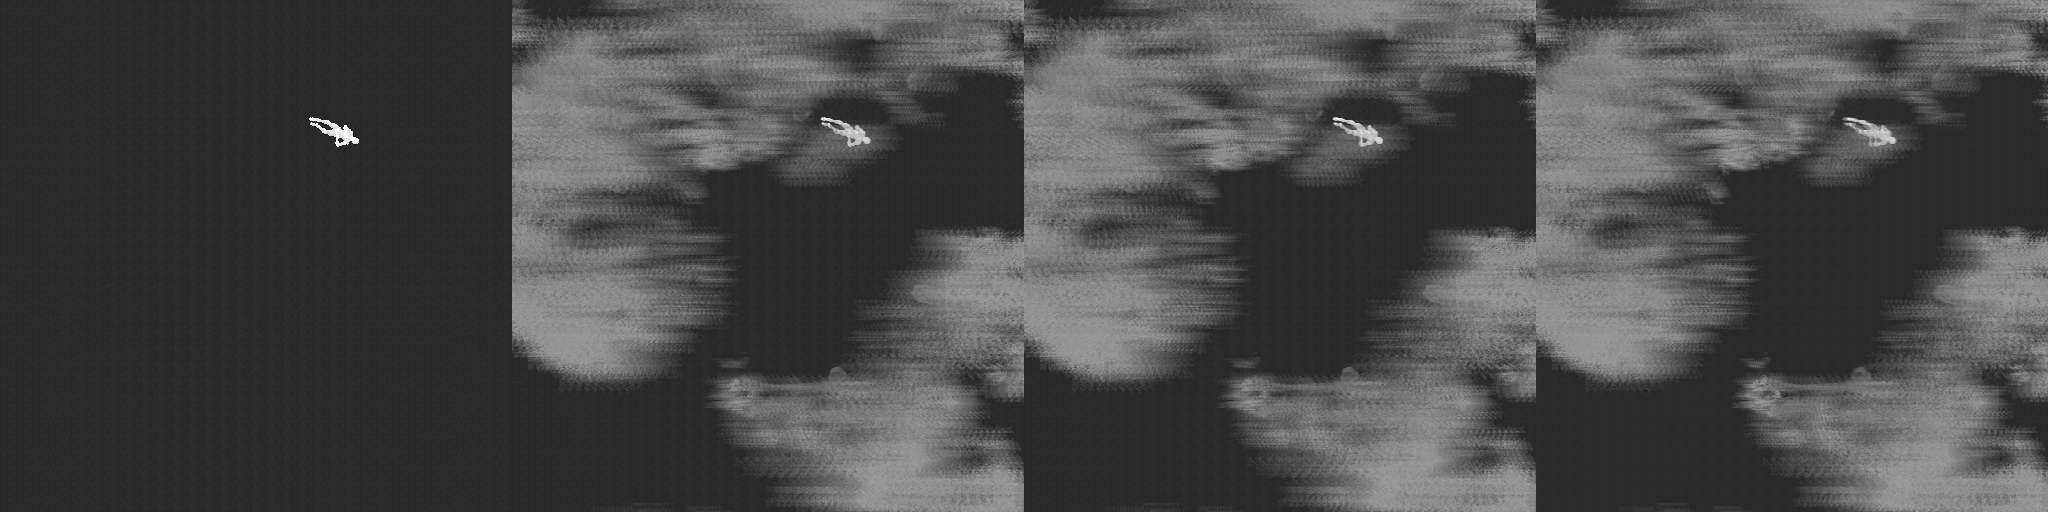

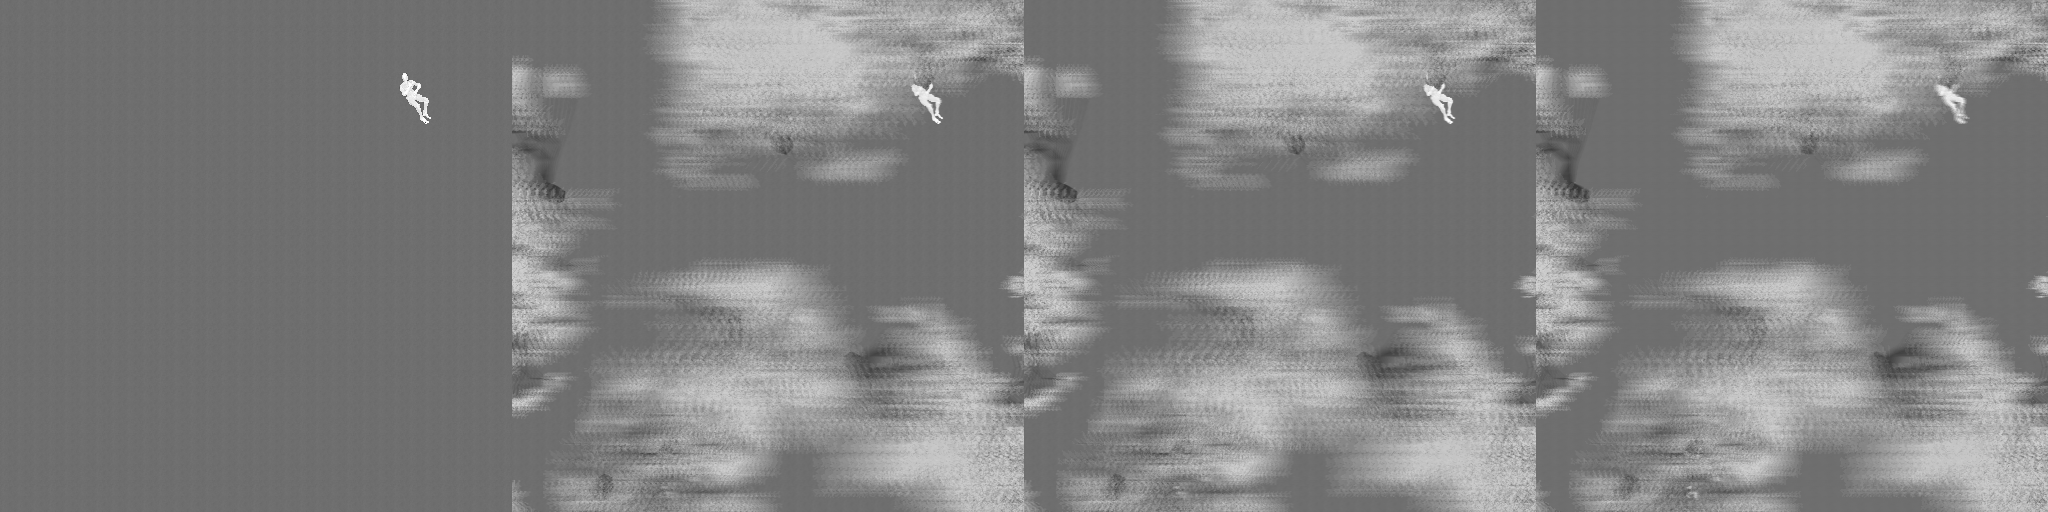

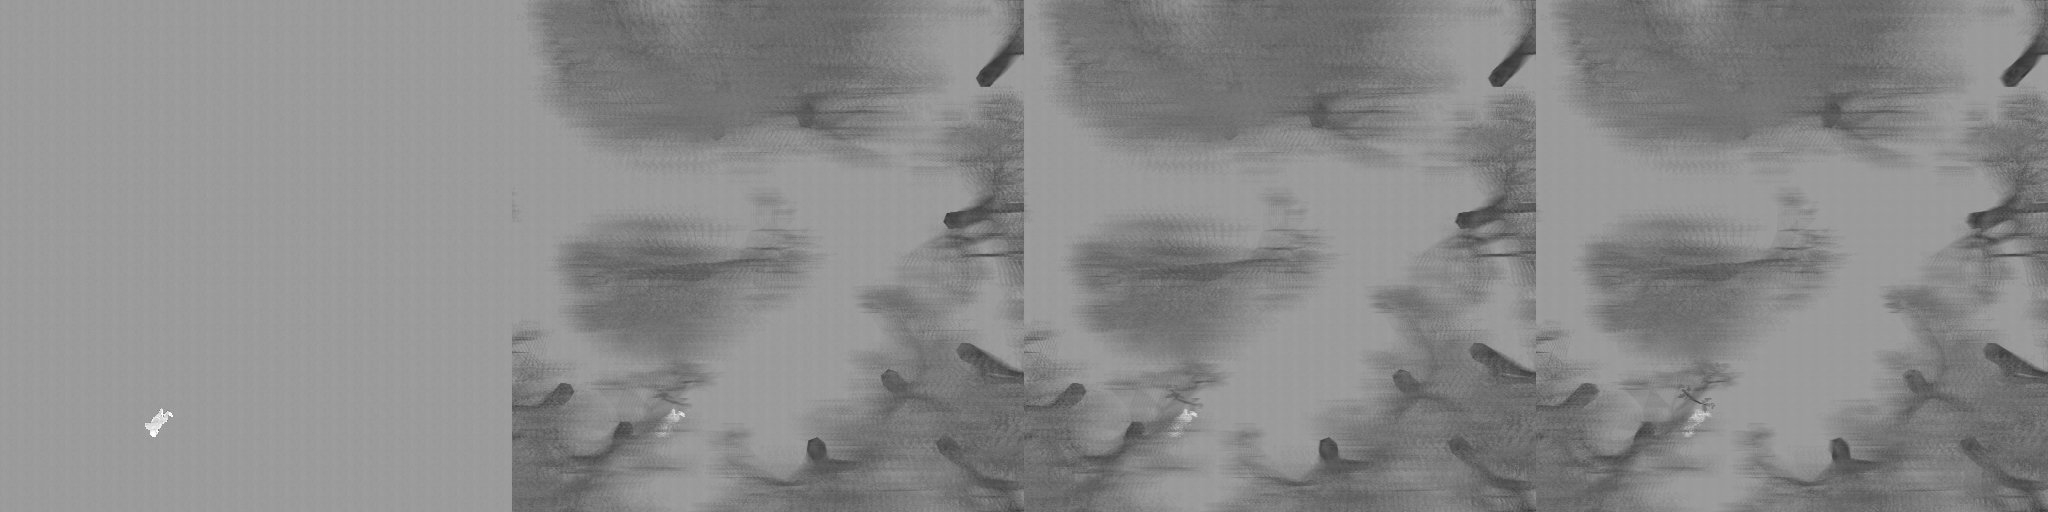

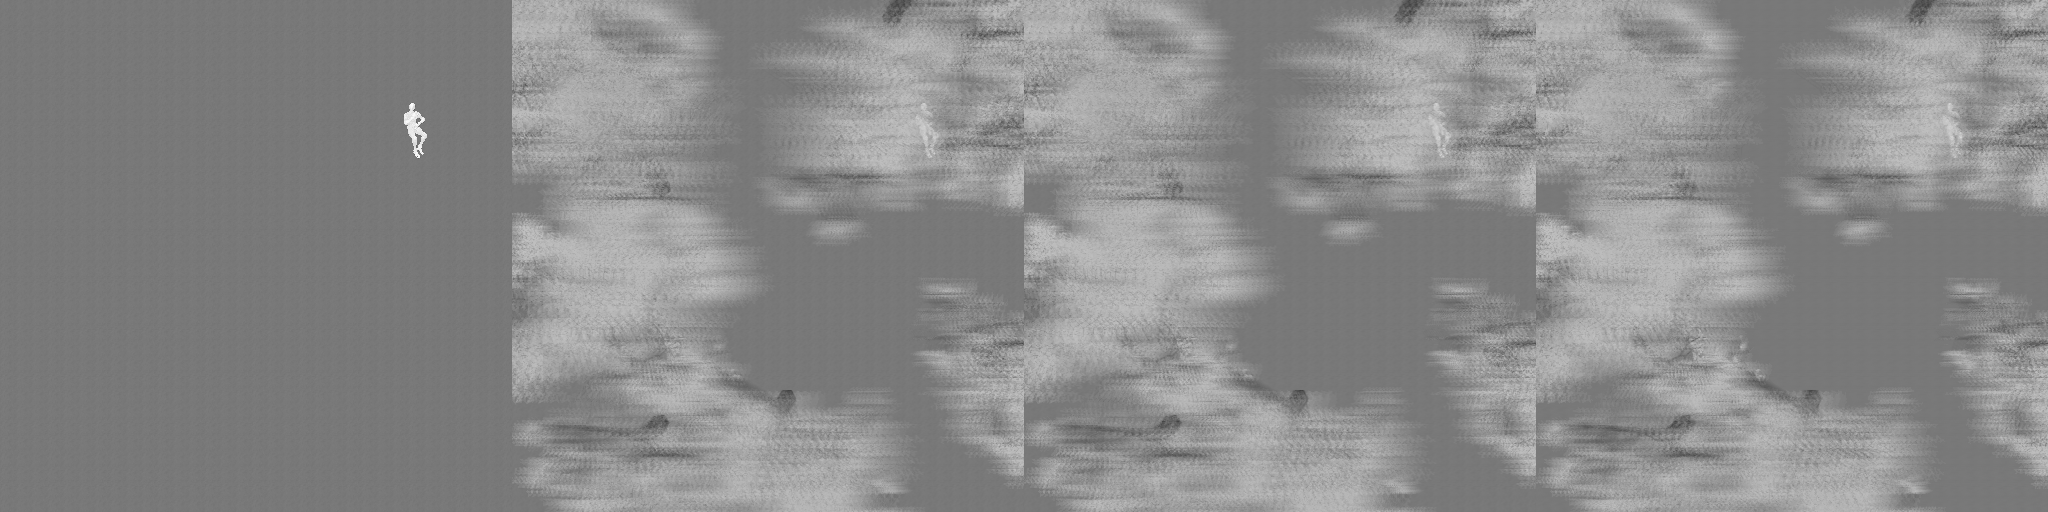

In [44]:
plot_dataset(dataset, n_images=5)

In [45]:
train_loader, test_loader = aos_dataloader(dataset, train_ratio=0.9)

In [46]:
train_loader, test_loader = get_aos_loaders(
    train_ratio=0.5,
    train_batch_size=1,
    test_batch_size=1,
    shuffle=False,
    patch_size=[100, 100],
    dataset_folder=G_DATASET_LOCATION
)

In [47]:
feature, label = next(iter(train_loader))
print(feature.shape)
print(label.shape)

torch.Size([1, 3, 100, 100])
torch.Size([1, 1, 100, 100])


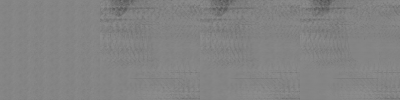

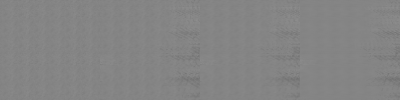

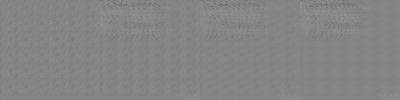

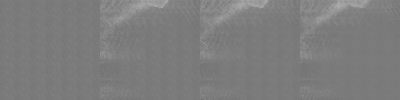

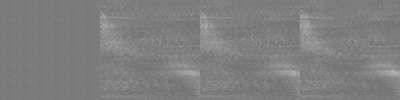

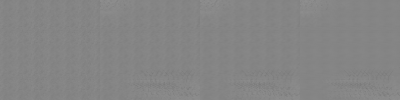

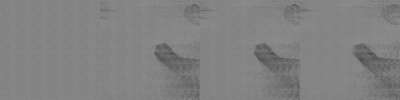

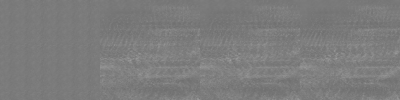

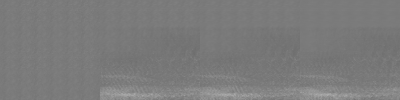

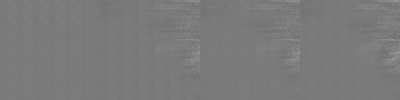

In [48]:
plot_dataloader(train_loader, n_images=10)